# Rf 3 0 6_Condpereventerrors
Multidimensional models: complete example with use of conditional p.d.f. with per-event errors




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:48 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


B-physics pdf with per-event Gaussian resolution
----------------------------------------------------------------------------------------------

Observables

In [2]:
dt = ROOT.RooRealVar("dt", "dt", -10, 10)
dterr = ROOT.RooRealVar("dterr", "per-event error on dt", 0.01, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Build a gaussian resolution model scaled by the per-error =
gauss(dt,bias,sigma*dterr)

In [3]:
bias = ROOT.RooRealVar("bias", "bias", 0, -10, 10)
sigma = ROOT.RooRealVar(
    "sigma", "per-event error scale factor", 1, 0.1, 10)
gm = ROOT.RooGaussModel(
    "gm1", "gauss model scaled bt per-event error", dt, bias, sigma, dterr)

Construct decay(dt) (x) gauss1(dt|dterr)

In [4]:
tau = ROOT.RooRealVar("tau", "tau", 1.548)
decay_gm = ROOT.RooDecay("decay_gm", "decay", dt,
                         tau, gm, ROOT.RooDecay.DoubleSided)

Construct fake 'external' data with per-event error
------------------------------------------------------------------------------------------------------

Use landau p.d.f to get somewhat realistic distribution with long tail

In [5]:
pdfDtErr = ROOT.RooLandau("pdfDtErr", "pdfDtErr", dterr, ROOT.RooFit.RooConst(
    1), ROOT.RooFit.RooConst(0.25))
expDataDterr = pdfDtErr.generate(ROOT.RooArgSet(dterr), 10000)

Sample data from conditional decay_gm(dt|dterr)
---------------------------------------------------------------------------------------------

Specify external dataset with dterr values to use decay_dm as
conditional p.d.f.

In [6]:
data = decay_gm.generate(ROOT.RooArgSet(
    dt), ROOT.RooFit.ProtoData(expDataDterr))

Fit conditional decay_dm(dt|dterr)
---------------------------------------------------------------------

Specify dterr as conditional observable

In [7]:
decay_gm.fitTo(data, ROOT.RooFit.ConditionalObservables(
    ROOT.RooArgSet(dterr)))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 bias         0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        1.00000e+00  4.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=23876.4 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

Plot conditional decay_dm(dt|dterr)
---------------------------------------------------------------------

Make two-dimensional plot of conditional p.d.f in (dt,dterr)

In [8]:
hh_decay = decay_gm.createHistogram("hh_decay", dt, ROOT.RooFit.Binning(
    50), ROOT.RooFit.YVar(dterr, ROOT.RooFit.Binning(50)))
hh_decay.SetLineColor(ROOT.kBlue)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(gm1_conv_exp(-abs(@0)/@1)_dt_tau_[decay_gm]_Int[dt,dterr]) using numeric integrator RooIntegrator1D to calculate Int(dterr)


Plot decay_gm(dt|dterr) at various values of dterr

In [9]:
frame = dt.frame(ROOT.RooFit.Title(
    "Slices of decay(dt|dterr) at various dterr"))
for ibin in range(0, 100, 20):
    dterr.setBin(ibin)
    decay_gm.plotOn(frame, ROOT.RooFit.Normalization(5.))

Make projection of data an dt

In [10]:
frame2 = dt.frame(ROOT.RooFit.Title("Projection of decay(dt|dterr) on dt"))
data.plotOn(frame2)

<ROOT.RooPlot object ("frame_dt_55bbf2490da0") at 0x55bbf2490da0>

Make projection of decay(dt|dterr) on dt.

Instead of integrating out dterr, a weighted average of curves
at values dterr_i as given in the external dataset.
(The kTRUE argument bins the data before projection to speed up the process)

In [11]:
decay_gm.plotOn(frame2, ROOT.RooFit.ProjWData(expDataDterr, ROOT.kTRUE))

<ROOT.RooPlot object ("frame_dt_55bbf2490da0") at 0x55bbf2490da0>

[#1] INFO:Plotting -- RooAbsReal::plotOn(decay_gm) plot on dt averages using data variables (dterr)
[#1] INFO:Plotting -- RooDataWeightedAverage::ctor(decay_gmDataWgtAvg) constructing data weighted average of function decay_gm_Norm[dt] over 100 data points of (dterr) with a total weight of 10000
.........................................................................................................................................................................................................................

Draw all frames on canvas

In [12]:
c = ROOT.TCanvas("rf306_condpereventerrors",
                 "rf306_condperventerrors", 1200, 400)
c.Divide(3)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.20)
hh_decay.GetZaxis().SetTitleOffset(2.5)
hh_decay.Draw("surf")
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.6)
frame.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.6)
frame2.Draw()

c.SaveAs("rf306_condpereventerrors.png")

Info in <TCanvas::Print>: png file rf306_condpereventerrors.png has been created


Draw all canvases 

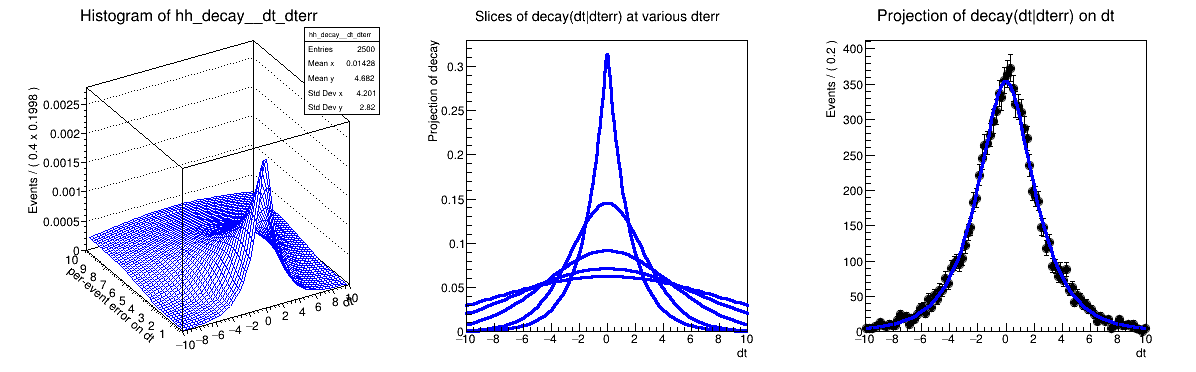

In [13]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()